<a href="https://colab.research.google.com/github/sudhe-er/sudhe-er/blob/main/Apple_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pandas_datareader as data

In [62]:
df= pd.read_csv('/content/AAPL.csv')
df= df.iloc[:,0:2]
df


,Date,Open
0,2018-01-02,42.540001
1,2018-01-03,43.132500
2,2018-01-04,43.134998
3,2018-01-05,43.360001
4,2018-01-08,43.587502
...,...,...
609,2020-06-04,81.097504
610,2020-06-05,80.837502
611,2020-06-08,82.562500
612,2020-06-09,83.035004


In [63]:
rows = len(df)
rows

614

In [64]:
df.Date=pd.to_datetime(df.Date,format="%Y/%m/%d")
df=df.set_index('Date')
df.tail()

,Open
Date,
2020-06-04,81.097504
2020-06-05,80.837502
2020-06-08,82.562500
2020-06-09,83.035004
2020-06-10,86.974998


In [80]:
ma100 = df.rolling(100).mean()
ma100

,Open
Date,
2018-01-02,NaN
2018-01-03,NaN
2018-01-04,NaN
2018-01-05,NaN
2018-01-08,NaN
...,...
2020-06-04,73.113625
2020-06-05,73.142900
2020-06-08,73.176775


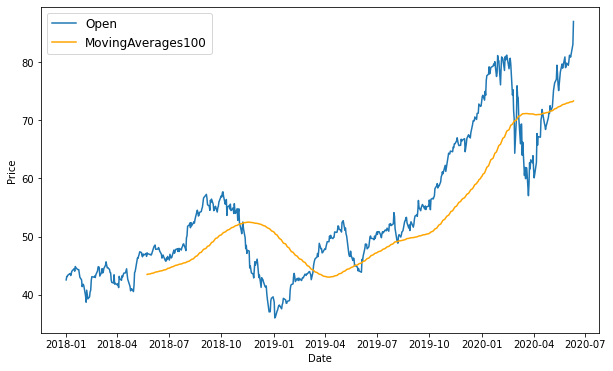

In [89]:
plt.figure(figsize=(10,6))
plt.plot(df['Open'],label = 'Open')
plt.plot(ma100,label='MovingAverages100',color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best',fontsize='large')
plt.show()

In [83]:
ma200=df.rolling(200).mean()
ma200

,Open
Date,
2018-01-02,NaN
2018-01-03,NaN
2018-01-04,NaN
2018-01-05,NaN
2018-01-08,NaN
...,...
2020-06-04,67.506837
2020-06-05,67.647425
2020-06-08,67.794000


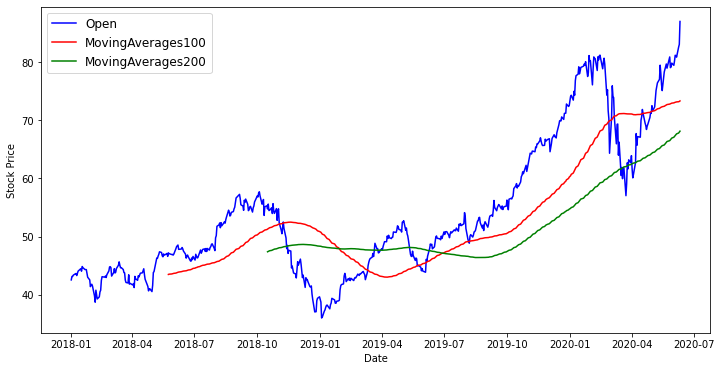

In [86]:
plt.figure(figsize=(12,6))
plt.plot(df['Open'], label = 'Open', color='blue')
plt.plot(ma100,label='MovingAverages100',color='red')
plt.plot(ma200,label='MovingAverages200',color='green')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(loc='best',fontsize='large')
plt.show()

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

df_scaled = scaler.fit_transform(df)

In [66]:
forecast_features_set = []
labels = []
for i in range(60, rows):
    forecast_features_set.append(df_scaled[i-60:i, 0])
    labels.append(df_scaled[i, 0])

In [67]:
forecast_features_set , labels = np.array(forecast_features_set ), np.array(labels)
forecast_features_set = np.reshape(forecast_features_set, (forecast_features_set.shape[0], forecast_features_set.shape[1], 1))
forecast_features_set.shape 

(554, 60, 1)

In [68]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(forecast_features_set.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(forecast_features_set, labels, epochs = 50, batch_size = 20)

Epoch 1/50
28/28 [==============================] - 12s 115ms/step - loss: 0.0352
Epoch 2/50
28/28 [==============================] - 3s 118ms/step - loss: 0.0096
Epoch 3/50
28/28 [==============================] - 3s 114ms/step - loss: 0.0077
Epoch 4/50
28/28 [==============================] - 3s 118ms/step - loss: 0.0065
Epoch 5/50
28/28 [==============================] - 3s 114ms/step - loss: 0.0055
Epoch 6/50
28/28 [==============================] - 3s 115ms/step - loss: 0.0061
Epoch 7/50
28/28 [==============================] - 3s 118ms/step - loss: 0.0047
Epoch 8/50
28/28 [==============================] - 3s 116ms/step - loss: 0.0047
Epoch 9/50
28/28 [==============================] - 3s 116ms/step - loss: 0.0039
Epoch 10/50
28/28 [==============================] - 3s 117ms/step - loss: 0.0043
Epoch 11/50
28/28 [==============================] - 3s 117ms/step - loss: 0.0046
Epoch 12/50
28/28 [==============================] - 3s 122ms/step - loss: 0.0039
Epoch 13/50
28/28 [=====

In [69]:
model.save('Keras_model2.h5')

In [70]:
forecast_list=[]

batch=df_scaled[-forecast_features_set.shape[1]:].reshape((1,forecast_features_set.shape[1],1))

for i in range(forecast_features_set.shape[1]):
    forecast_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:], [[forecast_list[i]]], axis=1)

1/1 [==============================] - 0s 33ms/step


In [90]:
df_predict=pd.DataFrame(scaler.inverse_transform(forecast_list),index=df[-forecast_features_set.shape[1]:].index, 
                        columns=["prediction"])

df_predict =pd.concat([df,df_predict],axis=1)
df_predict.tail(10)

,Open,prediction
Date,,
2020-05-28,79.192497,64.306447
2020-05-29,79.812500,64.527016
2020-06-01,79.437500,64.748263
2020-06-02,80.187500,64.969160
2020-06-03,81.165001,65.188128
2020-06-04,81.097504,65.404218
2020-06-05,80.837502,65.616935
2020-06-08,82.562500,65.825353
2020-06-09,83.035004,66.027952


from pandas.tseries.offsets import DateOffset
add_dates=[df.index[-1]+DateOffset(days=x) for x in range(0,61)]
future_dates=pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [72]:
from pandas.tseries.offsets import DateOffset
add_dates=[df.index[-1]+DateOffset(days=x) for x in range(0,61)]
future_dates=pd.DataFrame(index=add_dates[1:],columns=df.columns)



In [73]:
future_dates.tail(60)

,Open
2020-06-11,NaN
2020-06-12,NaN
2020-06-13,NaN
2020-06-14,NaN
2020-06-15,NaN
2020-06-16,NaN
2020-06-17,NaN
2020-06-18,NaN
2020-06-19,NaN
2020-06-20,NaN


In [74]:
df_forecast=pd.DataFrame(scaler.inverse_transform(forecast_list),index=future_dates[-forecast_features_set.shape[1]:].index, 
                        columns=["prediction"])

df_forecast =pd.concat([df,df_forecast],axis=1)

In [75]:
df_forecast.tail(60)

,Open,prediction
2020-06-11,NaN,80.236937
2020-06-12,NaN,80.569401
2020-06-13,NaN,80.781438
2020-06-14,NaN,80.824450
2020-06-15,NaN,80.706991
2020-06-16,NaN,80.462632
2020-06-17,NaN,80.116379
2020-06-18,NaN,79.693159
2020-06-19,NaN,79.216399
2020-06-20,NaN,78.692133


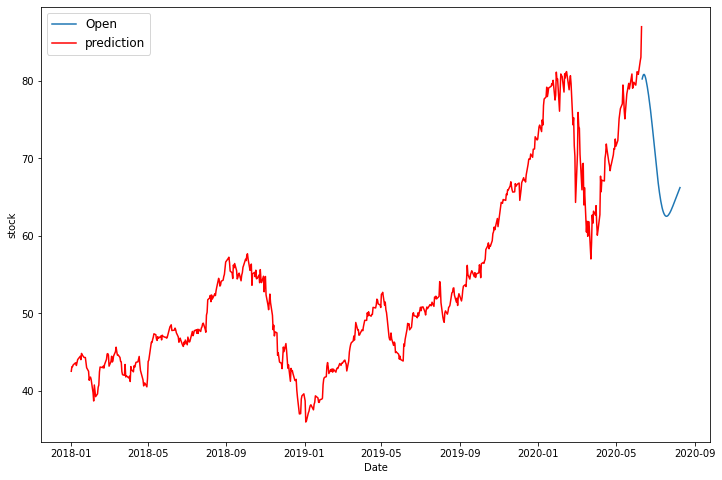

In [79]:
plt.figure(figsize=(12,8))
plt.plot(df_forecast.index,df_forecast["prediction"],label="Open")
plt.plot(df_predict.index,df_predict["Open"],color="r",label="prediction")
plt.legend(loc='best',fontsize='large')
plt.xlabel("Date")
plt.ylabel("stock")
plt.show()